In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [4]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [5]:
X = df.drop('CustomerID', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


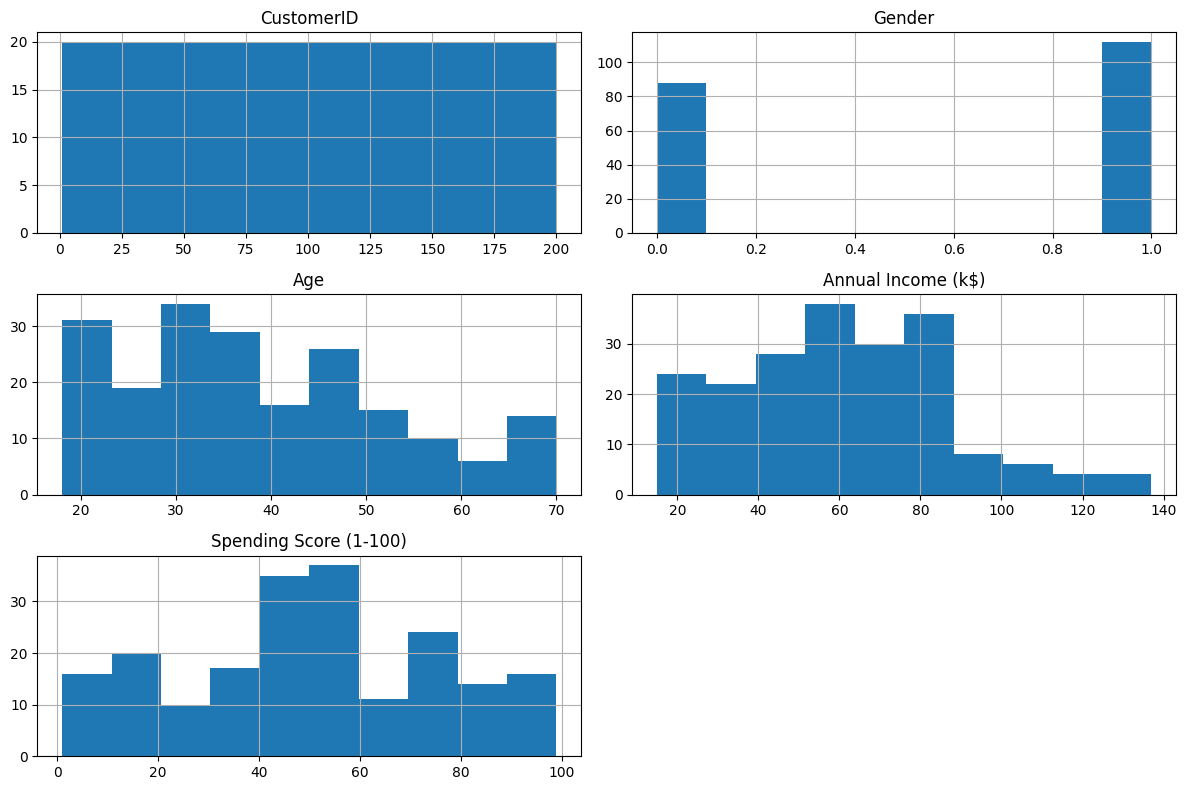

In [7]:
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

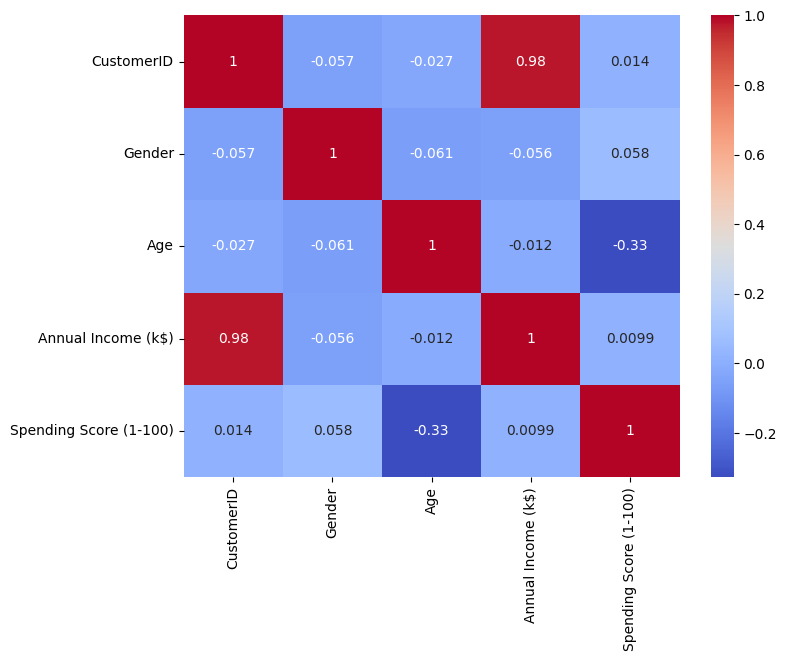

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
def agglomerative_test(linkage_type, n_cluster):
    model = AgglomerativeClustering(
        n_clusters=n_cluster,
        linkage=linkage_type
    )
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    return labels, score

In [10]:
linkages = ['single', 'complete', 'average', 'ward']
scores = {}

for l in linkages:
    labels, score = agglomerative_test(l, 3)
    scores[l] = score
    print(f"{l.capitalize()} Linkage - Silhouette Score: {score:.3f}")

Single Linkage - Silhouette Score: 0.218
Complete Linkage - Silhouette Score: 0.208
Average Linkage - Silhouette Score: 0.278
Ward Linkage - Silhouette Score: 0.248


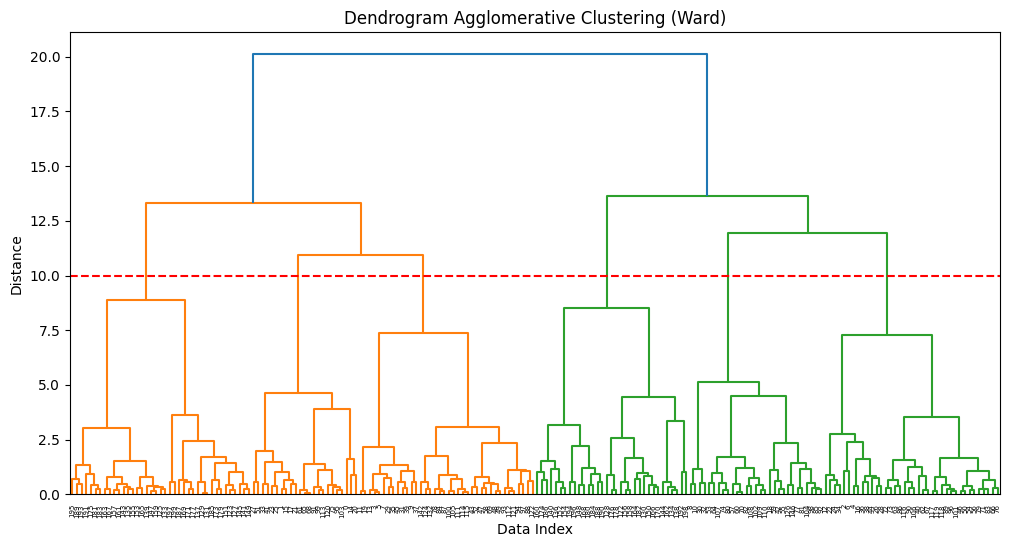

In [11]:
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12,6))
dendrogram(linked)
plt.axhline(y=10, color='r', linestyle='--')
plt.title("Dendrogram Agglomerative Clustering (Ward)")
plt.xlabel("Data Index")
plt.ylabel("Distance")
plt.show()

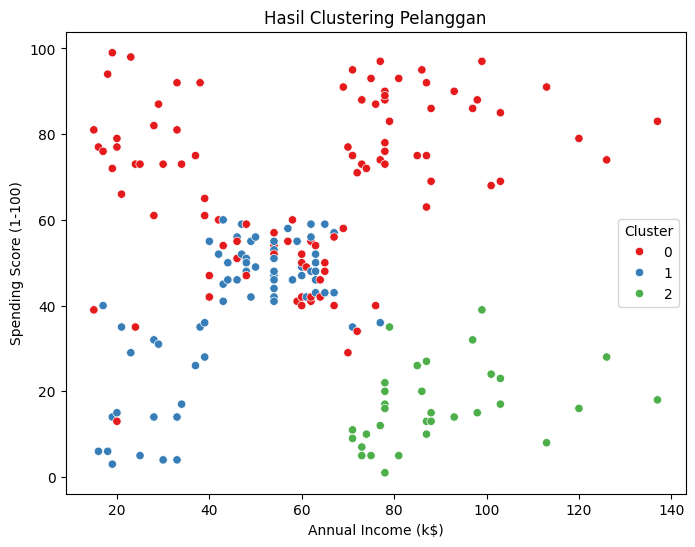

In [12]:
ward_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Cluster'] = ward_model.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='Set1'
)
plt.title("Hasil Clustering Pelanggan")
plt.show()